<a href="https://colab.research.google.com/github/AlexsandroAmaro/student-performance-analysis/blob/main/Projeto_3__Estudo_dos_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decodificando o Sucesso: Uma Análise dos Hábitos dos Alunos

In [ ]:
pip install matplotlib

Objetivo: O que realmente impacta a nota de um aluno?
O senso comum nos diz para "estudar mais e se distrair menos". Mas quão verdadeiro é isso? Este projeto mergulha em um dataset de performance e hábitos de alunos para encontrar os padrões reais por trás das notas.

A investigação foi dividida em duas grandes questões:

Qual é o impacto real do tempo de estudo?

O tempo gasto em redes sociais realmente prejudica o desempenho?

#Bibliotecas utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Conhecendo o Dataset

In [ ]:
df = pd.read_csv(r'/content/sample_data/student_habits_performance.csv')

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


#O Mapa das Relações

O primeiro passo foi entender o ecossistema dos dados. Como todas as variáveis (notas, tempo de estudo, tempo em redes sociais, etc.) conversam entre si?

Um mapa de calor (heatmap) de correlação foi a ferramenta perfeita para isso.

In [ ]:
colunas_numericas = df.select_dtypes(include=['number'])
colunas_numericas = colunas_numericas.drop('age', axis=1)
colunas_numericas.head()

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,6.9,2.8,2.3,97.3,4.6,6,8,100.0
2,1.4,3.1,1.3,94.8,8.0,1,1,34.3
3,1.0,3.9,1.0,71.0,9.2,4,1,26.8
4,5.0,4.4,0.5,90.9,4.9,3,1,66.4


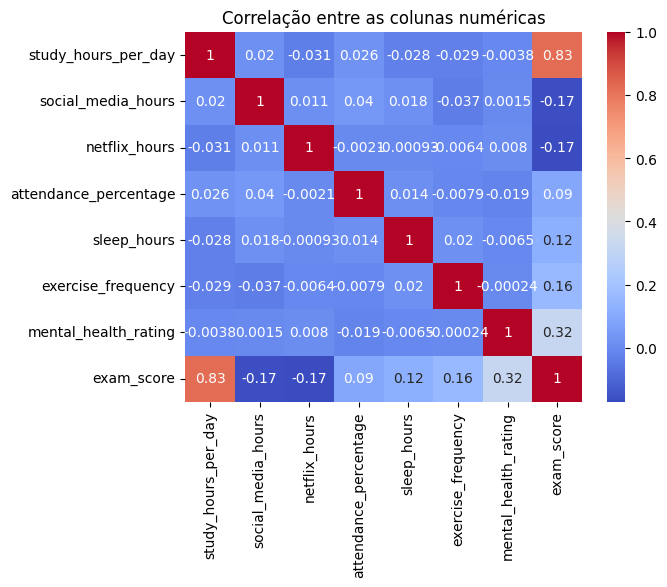

In [ ]:
sns.heatmap(colunas_numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as colunas numéricas')
plt.show()

Duas correlações saltaram aos olhos imediatamente:

Forte e Positiva: Entre Nota e Tempo de Estudo.

Fraca e Negativa: Entre Nota e Tempo em Redes Sociais.

Decidi investigar as duas, começando pela mais forte.

#Investigação 1: Confirmando o Óbvio (Estudar Vale a Pena)

A correlação positiva entre Tempo de Estudo e Nota era forte, mas o quão forte?

Um gráfico de dispersão (scatter plot) mostrou uma linha de tendência positiva clara: quanto mais tempo o aluno dedicava, maior a tendência de sua nota ser alta.

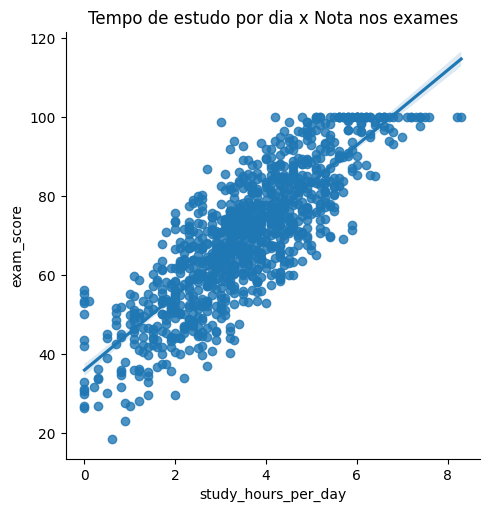

In [ ]:
sns.lmplot(data= df, x="study_hours_per_day", y="exam_score")
plt.title('Tempo de estudo por dia x Nota nos exames')
plt.show()

Mas o verdadeiro impacto foi revelado ao comparar os extremos. Criei dois grupos de alunos:

Grupo 1: Alunos que estudavam menos de 2 horas.

Grupo 2: Alunos que estudavam mais de 5 horas.

In [ ]:
filtro_estudo_alto = colunas_numericas['study_hours_per_day'] > 5
filtro_estudo_baixo = colunas_numericas['study_hours_per_day'] < 2

grupo_estudo_alto = colunas_numericas[filtro_estudo_alto]["exam_score"]
grupo_estudo_baixo = colunas_numericas[filtro_estudo_baixo]["exam_score"]

print("Media notas (estuda > 5h)", grupo_estudo_alto.mean())
print("Media notas (estuda < 2h)", grupo_estudo_baixo.mean())




Media notas (estuda > 5h) 90.79419354838709
Media notas (estuda < 2h) 45.56390977443609


A diferença na média das notas foi impressionante:

Média (Menos de 2h): 45

Média (Mais de 5h): 90

Conclusão 1: Alunos que dedicaram mais de 5 horas de estudo tiveram, em média, o dobro da nota daqueles que estudaram menos de 2 horas.

#Investigação 2: A Nuance da Distração (O Caso das Redes Sociais)

Segunda descoberta do heatmap foi mais sutil: uma correlação fraca e negativa entre Notas e Tempo em Redes Sociais.

Um número "fraco" pode ser enganoso. Será que não há relação, ou será que ela está escondida nos dados?

Para investigar, o primeiro passo foi entender como os alunos usavam redes sociais. Um histograma do tempo gasto mostrou que os dados se concentravam em intervalos claros.

Text(0.5, 1.0, 'Tempo em redes sociais')

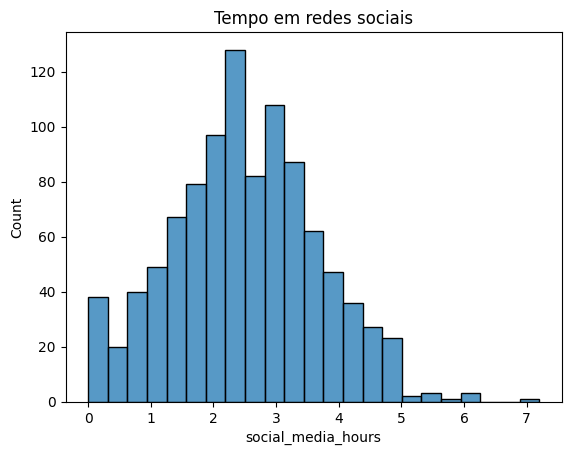

In [ ]:
sns.histplot(data= df, x="social_media_hours")
plt.title('Tempo em redes sociais')

Baseado nessa distribuição, decidi que uma análise geral não era suficiente. Segmentei os alunos em três grupos para comparar:

Grupo 1: 0 a 2 horas

Grupo 2: 2 a 4 horas

Grupo 3: 4 a 6 horas

A melhor ferramenta para comparar a distribuição de notas entre grupos é o Boxplot. Os resultados foram fascinantes.

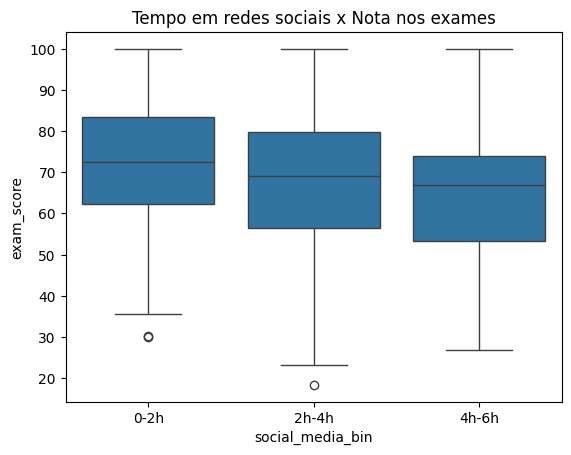

In [ ]:
colunas_numericas["social_media_bin"] = pd.cut(
    colunas_numericas["social_media_hours"],
    bins=[0,2,4,6],
    labels=["0-2h", "2h-4h", "4h-6h"]
)
sns.boxplot(data= colunas_numericas, x="social_media_bin", y="exam_score")
plt.title('Tempo em redes sociais x Nota nos exames')
plt.show()

A Descoberta: Ao analisar os boxplots, a tendência escondida apareceu:

Mediana em Queda: Alunos no grupo de 0-2 horas tinham a mediana de notas mais alta (acima de 60%). Conforme o tempo nas redes sociais aumentava (2-4h e 4-6h), a mediana das notas caía progressivamente.

A Explicação da "Correlação Fraca": Os boxplots também explicaram por que a correlação geral era "fraca". Em todos os grupos, havia alunos com notas altas e baixas (as "caudas" ou whiskers longos). Você pode usar muita rede social e ainda tirar nota alta, mas a probabilidade diminui.

Conclusão 2: Embora não seja uma regra de "causa e efeito" tão forte quanto o tempo de estudo, o tempo gasto em redes sociais tem, sim, uma influência negativa. O gráfico de boxplot provou que, em média, quanto mais tempo o aluno passa em redes sociais, menor tende a ser seu desempenho.

#Conclusão

Esta análise contou uma história de duas partes:

O Fator Decisivo: O sucesso acadêmico é, antes de tudo, determinado pelos fundamentos. O tempo de estudo é o pilar com o impacto mais forte e direto nas notas.

O Fator Sutil: Distrações, como o tempo excessivo em redes sociais, atuam como um "vento contrário" sutil. Elas corroem a performance média, como provado pela queda na mediana das notas.

Isso demonstra o poder da Análise Exploratória: não basta olhar para um único número de correlação. É preciso segmentar, visualizar (com boxplots e histogramas) e cavar mais fundo para encontrar a verdadeira história por trás dos dados.